## Calculating likelihoods

In [1]:
import matplotlib.pyplot as plt
import corner as corner
import pandas as pd
import numpy as np
import h5py
import torch
import time

from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.utils.flow import NFlow
from populations.Flowsclass_dev import FlowModel
from populations import gw_obs

from sample import sample

glasflow is using its own internal version of nflows


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
params = ['mchirp','q', 'chieff', 'z']
file_path='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
gw_path = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/gw_events'
observations, obsdata, p_theta, events = gw_obs.generate_observations(params, gw_path, \
                                            100, 'posteriors', None)

model_names, flow = read_models.get_models(file_path, ['CE'], params, use_flows=True, device='cpu')
_, KDE = read_models.get_models(file_path, ['CE'], params, use_flows=False, device='cpu')

100%|██████████| 20/20 [00:08<00:00,  2.45it/s]


## Likelihoods In sampling

In [3]:
#inputs: x, data, pop_models, submodels_dict, channels, use_flows
hyperparams = list(set([x.split('/', 1)[1] for x in model_names]))
Nhyper = np.max([len(x.split('/')) for x in hyperparams])
channels = sorted(list(set([x.split('/')[0] for x in model_names])))

# construct dict that relates submodels to their index number
submodels_dict = {} #dummy index dict keys:0,1,2,3, items: particular models
ctr=0 #associates with either chi_b or alpha (0 or 1)
while ctr < Nhyper:
    submodels_dict[ctr] = {}
    hyper_set = sorted(list(set([x.split('/')[ctr] for x in hyperparams])))
    for idx, model in enumerate(hyper_set): #idx associates with 0,1,2,3,(4) keys
        submodels_dict[ctr][idx] = model
    ctr += 1

In [4]:
flow_path="/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/flow_models/cosmo_weights/"
flow['CE'].load_model(flow_path, 'CE')

In [5]:
lnlike_flow=np.zeros((4,5))
for chibid in range(4):
    for alphaid in range(5):
        lnlike_flow[chibid,alphaid]=sample.lnlike([chibid,alphaid],obsdata, flow, submodels_dict, ['CE'], use_flows=True)

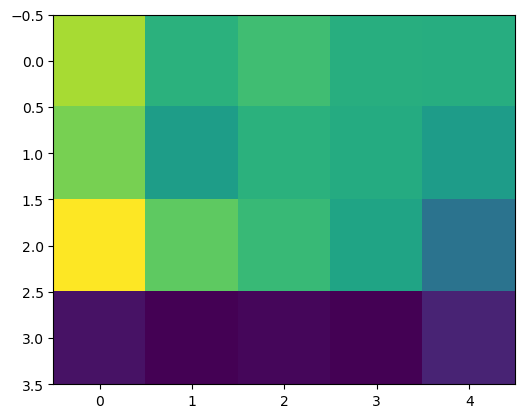

In [6]:
plt.imshow(lnlike_flow)

In [7]:
from functools import reduce
import operator
def getFromDict(dataDict, mapList):
    return reduce(operator.getitem, mapList, dataDict)

In [8]:
lnlike_kde=np.zeros((4,5))
for chibid in range(4):
    for alphaid in range(5):
        lnlike_kde[chibid,alphaid]=sample.lnlike([chibid,alphaid,1.],obsdata, KDE, submodels_dict, ['CE'], use_flows=False)

['CE', 'chi00', 'alpha02']
1.0
0.0
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf]
[2.56517013e-03 9.57339440e-04 2.04189627e-03 5.97370864e-04
 1.30881890e-06 9.97676828e-04 2.25321117e-04 2.90513956e-19
 8.44569018e-06 3.70976316e-03 6.25580970e-04 1.15266243e-03
 1.79879578e-03 1.29644192e-04 1.22479564e-03 4.39814303e-04
 7.37576493e-04 1.84211706e-03 2.76904710e-02 8.21421678e-04
 1.03007113e-03 3.95796739e-04 4.18311326e-03 1.91931238e-02
 7.41726057e-04 2.96271225e-03 2.10807336e-05 1.36417313e-04
 1.75394269e-04 1.55427428e-03 3.93878213e-03 1.10706202e-03
 1.50945724e-03 3.29745043e-02 7.00538159e-04 6.03854243e-04
 1.48881486e-03 9.94733895e-08 3.84059209e-02 1.00000000e-50
 6.41952899e-04 3.34538753e-04 2.41461653e-02 1.09707441e-10
 2.07496872e-03 2.72256801e-04]
[  -5.96573047   -6.9513525

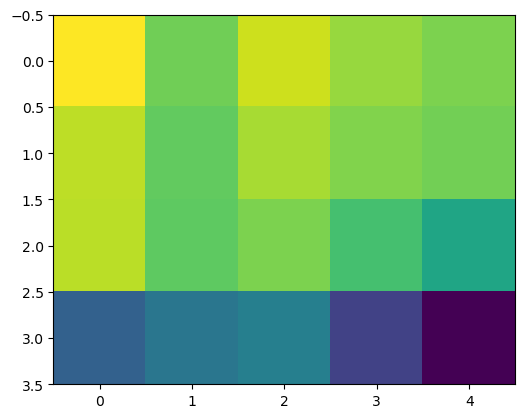

In [9]:
plt.imshow(lnlike_kde)